## Import Libraries

In [1]:
!pip install wordcloud

In [2]:
# nltk.download('stopwords')

In [3]:
 #nltk.download('punkt')

In [4]:
import spacy
import pickle
import random
import doc
from spacy import displacy

import warnings
warnings.filterwarnings("ignore")
import glob
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
from spacy import displacy
import docx
from spacy import schemas
from spacy import Dict
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install textract
import textract
#import textract
#text = textract.process("path/to/file.extension")
#import antiword
!pip install PyPDF2
import PyPDF2
from PyPDF2 import PdfFileReader
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from spacy.matcher import Matcher

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
import nltk
from spacy.matcher import Matcher

## Import Data
## For Sql developer resumes

In [5]:
path="D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight"
all_files=glob.glob(path + "/*.docx")
all_files

['D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Anil kumar.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\AradhanaTripathi[4_0].docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Buddha Vamsi.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\kamballapradeep.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Neeraj Mishra.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\premsai.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\PSyamKumar[2_3].docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Rajupavanakumari[2_10].docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Ramalakshmi K.docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\RameshNataru[3_4].docx',
 'D:\\projct-2\\Resumes\\Resumes\\SQL Developer Lightning insight\\Vinod B.docx']

In [6]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [7]:

li=[]
for filename in all_files:
    dummy_1=readtxt(filename)
    li.append(dummy_1)
    

In [8]:
import pandas as pd

In [9]:
dataframe=pd.DataFrame()

In [10]:
for files in all_files:
    print(files)
    dataframe["cv"]=li

D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Anil kumar.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\AradhanaTripathi[4_0].docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Buddha Vamsi.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\kamballapradeep.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Neeraj Mishra.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\premsai.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\PSyamKumar[2_3].docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Rajupavanakumari[2_10].docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Ramalakshmi K.docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\RameshNataru[3_4].docx
D:\projct-2\Resumes\Resumes\SQL Developer Lightning insight\Vinod B.docx


In [11]:
dataframe

cv
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...
2   BUDDHA VAMSI                                  ...
3   KAMBALLA PRADEEP                              ...
4    \n                                        Res...
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...
6                                          SQL SER...
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...
8                                       resume\n\n...
9   Name: Ramesh\n\nCareer Objective: \n          ...
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...

In [12]:
label_list=[]
for i in range (len(all_files)):
    label="SQLDeveloper"
    label_list.append(label)
    

In [13]:
dataframe["label"]=label_list

In [14]:
dataframe

cv         label
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  SQLDeveloper
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  SQLDeveloper
2   BUDDHA VAMSI                                  ...  SQLDeveloper
3   KAMBALLA PRADEEP                              ...  SQLDeveloper
4    \n                                        Res...  SQLDeveloper
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...  SQLDeveloper
6                                          SQL SER...  SQLDeveloper
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...  SQLDeveloper
8                                       resume\n\n...  SQLDeveloper
9   Name: Ramesh\n\nCareer Objective: \n          ...  SQLDeveloper
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...  SQLDeveloper

## For workday resumes

In [15]:
path1="D:\projct-2\Resumes\Resumes\workday resumes"
all_files1=glob.glob(path1 + "/*.docx")
all_files1

['D:\\projct-2\\Resumes\\Resumes\\workday resumes\\ChinnaSubbarayuduM_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\Gopi Krishna_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\Himaja G_(Hexaware).docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\Jyotiverma_Heaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\MooraboyinaGuravaiah_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\P V Sai Krishna_ Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\RahulM_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\RameshP_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\Srikanth-Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\SSKumar_Hexaware.docx',
 'D:\\projct-2\\Resumes\\Resumes\\workday resumes\\Vinay Kumar_Hexaware.docx']

In [16]:
li1=[]
for filename1 in all_files1:
    dummy_11=readtxt(filename1)
    li1.append(dummy_11)

In [17]:
dataframe1=pd.DataFrame()

In [18]:
for files in all_files1:
    print(files)
    dataframe1["cv"]=li1

D:\projct-2\Resumes\Resumes\workday resumes\ChinnaSubbarayuduM_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\Gopi Krishna_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\Himaja G_(Hexaware).docx
D:\projct-2\Resumes\Resumes\workday resumes\Jyotiverma_Heaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\MooraboyinaGuravaiah_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\P V Sai Krishna_ Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\RahulM_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\RameshP_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\Srikanth-Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\SSKumar_Hexaware.docx
D:\projct-2\Resumes\Resumes\workday resumes\Vinay Kumar_Hexaware.docx


In [19]:
label_list1=[]
for i in range (len(all_files1)):
    label1="workdayResumes"
    label_list1.append(label1)
    

In [20]:
dataframe1["label"]=label_list1

In [21]:
dataframe1

cv           label
0   Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  workdayResumes
1   \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  workdayResumes
2                                         \n      ...  workdayResumes
3   \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...  workdayResumes
4   \n\nMooraboyina Guravaiah\nWorkday Integration...  workdayResumes
5   VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...  workdayResumes
6   Rahul  (Techno Functional Consultant)  \nProfe...  workdayResumes
7   Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workdayResumes
8   Seeking suitable positions in Workday HCM  as ...  workdayResumes
9   \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes
10                                                ...  workdayResumes

## For peoplesoft resumes

In [22]:
path2="D:\projct-2\Resumes\Resumes\Peoplesoft resumes"
all_files2=glob.glob(path2 + "/*.docx")
all_files2

['D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_AnubhavSingh.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_Murali.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_SirazuddinMohammad.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_Varkala Vikas.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\PeopleSoft DBA_Vivekanand Sayana.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_HariNarayana.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_Murali.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_PriyabrataHota.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_SUJATHA.docx',
 'D:\\projct-2\\Resumes\\Resumes\\Peoplesoft resumes\\Resume_Subha Santosh_Peoplesoft FSCM.docx']

In [23]:
li2=[]
for filename2 in all_files2:
    dummy_12=readtxt(filename2)
    li2.append(dummy_12)

In [24]:
dataframe2=pd.DataFrame()

In [25]:
for files in all_files2:
    print(files)
    dataframe2["cv"]=li2

D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft Admin_Varkala Vikas.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\PeopleSoft DBA_Vivekanand Sayana.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft FSCM_HariNarayana.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft FSCM_Murali.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft FSCM_PriyabrataHota.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Peoplesoft FSCM_SUJATHA.docx
D:\projct-2\Resumes\Resumes\Peoplesoft resumes\Resume_Subha Santosh_Peoplesoft FSCM.docx


In [26]:
label_list2=[]
for i in range (len(all_files2)):
    label2="Peoplesoft"
    label_list2.append(label2)
    

In [27]:
dataframe2["label"]=label_list2

In [28]:
dataframe2

cv       label
0    Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft
1  Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...  Peoplesoft
3   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...  Peoplesoft
4  PeopleSoft Administration\n \nVivekanand Sayan...  Peoplesoft
5  \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
6  \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
7   \n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...  Peoplesoft
8  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...  Peoplesoft
9  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...  Peoplesoft

## For React resumes

In [29]:
path3="D:\projct-2\Resumes\Resumes\React"
all_files3=glob.glob(path3 + "/*.docx")
all_files3

['D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Deepakreddy.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Haripriya.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Kamalakar Reddy.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Naveen sadhu.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Pragnya.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Sarala Madasu-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Thirupathiamma.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Dev_Krishna Kanth.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Dev_Krishna Kanth_Musquare Technologies.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React JS Developer_Venkatalakshmi (1)-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\Reactjs Developer_kambala sai surendra_Musquare

In [30]:
li3=[]
for filename3 in all_files3:
    dummy_13=readtxt(filename3)
    li3.append(dummy_13)
   

In [31]:
dataframe3=pd.DataFrame()

In [32]:
for files in all_files3:
    print(files)
    dataframe3["cv"]=li3


D:\projct-2\Resumes\Resumes\React\React Developer_Deepakreddy.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Haripriya.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Kamalakar Reddy.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Naveen sadhu.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Pragnya.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Sarala Madasu-converted.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Thirupathiamma.docx
D:\projct-2\Resumes\Resumes\React\React Dev_Krishna Kanth.docx
D:\projct-2\Resumes\Resumes\React\React Dev_Krishna Kanth_Musquare Technologies.docx
D:\projct-2\Resumes\Resumes\React\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx
D:\projct-2\Resumes\Resumes\React\React JS Developer_Venkatalakshmi (1)-converted.docx
D:\projct-2\Resumes\Resumes\React\Reactjs Developer_kambala sai surendra_Musquare Technologies.docx
D:\projct-2\Resumes\Resumes\React\Reactjs Developer_M Lokesh Babu_Musquare Technologies

In [33]:
label_list3=[]
for i in range (len(all_files3)):
    label3="ReactDeveloper"
    label_list3.append(label3)
    

In [34]:
dataframe3["label"]=label_list3

In [35]:
dataframe3

cv           label
0   Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  ReactDeveloper
1   HARIPRIYA BATTINA \nExperience as UI Developer...  ReactDeveloper
2   KAMALAKAR REDDY. A \nLinked In: https://www.li...  ReactDeveloper
3   \nNaveen Sadhu\n\n\nTitle: software developer\...  ReactDeveloper
4    \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  ReactDeveloper
5   \n\n 204,Sri geethika prestige,road number 10...  ReactDeveloper
6   \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  ReactDeveloper
7   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
8   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
9   Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  ReactDeveloper
10  Venkatalakshmi Pedireddy\nSoftware Developer\n...  ReactDeveloper
11  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  ReactDeveloper
12  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  ReactDeveloper
13  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactDeveloper
14  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  ReactDeveloper
15  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper
16  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper
17  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper

## For Internship Resumes

In [36]:
path4="D:\projct-2\Resumes\Resumes\React"
all_files4=glob.glob(path4 + "/*.docx")
all_files4

['D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Deepakreddy.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Haripriya.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Kamalakar Reddy.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Naveen sadhu.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Pragnya.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Sarala Madasu-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Developer_Thirupathiamma.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Dev_Krishna Kanth.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React Dev_Krishna Kanth_Musquare Technologies.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\React JS Developer_Venkatalakshmi (1)-converted.docx',
 'D:\\projct-2\\Resumes\\Resumes\\React\\Reactjs Developer_kambala sai surendra_Musquare

In [37]:
li4=[]
for filename4 in all_files4:
    dummy_14=readtxt(filename4)
    li4.append(dummy_14)
    

In [38]:
dataframe4=pd.DataFrame()

In [39]:
for files in all_files4:
    print(files)
    dataframe4["cv"]=li4

D:\projct-2\Resumes\Resumes\React\React Developer_Deepakreddy.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Haripriya.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Kamalakar Reddy.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Naveen sadhu.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Pragnya.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Sarala Madasu-converted.docx
D:\projct-2\Resumes\Resumes\React\React Developer_Thirupathiamma.docx
D:\projct-2\Resumes\Resumes\React\React Dev_Krishna Kanth.docx
D:\projct-2\Resumes\Resumes\React\React Dev_Krishna Kanth_Musquare Technologies.docx
D:\projct-2\Resumes\Resumes\React\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx
D:\projct-2\Resumes\Resumes\React\React JS Developer_Venkatalakshmi (1)-converted.docx
D:\projct-2\Resumes\Resumes\React\Reactjs Developer_kambala sai surendra_Musquare Technologies.docx
D:\projct-2\Resumes\Resumes\React\Reactjs Developer_M Lokesh Babu_Musquare Technologies

In [40]:
label_list4=[]
for i in range (len(all_files4)):
    label4="Internship"
    label_list4.append(label4)

In [41]:
dataframe4["label"]=label_list4

In [42]:
dataframe4

cv       label
0   Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  Internship
1   HARIPRIYA BATTINA \nExperience as UI Developer...  Internship
2   KAMALAKAR REDDY. A \nLinked In: https://www.li...  Internship
3   \nNaveen Sadhu\n\n\nTitle: software developer\...  Internship
4    \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  Internship
5   \n\n 204,Sri geethika prestige,road number 10...  Internship
6   \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  Internship
7   \nUi-Developer/ React JS Developer \nNAME: KRI...  Internship
8   \nUi-Developer/ React JS Developer \nNAME: KRI...  Internship
9   Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  Internship
10  Venkatalakshmi Pedireddy\nSoftware Developer\n...  Internship
11  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  Internship
12  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  Internship
13  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  Internship
14  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  Internship
15  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  Internship
16  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  Internship
17  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  Internship

In [43]:
dataframe4.to_csv("df4.csv")

## Final dataframe

In [44]:
final=pd.concat([dataframe,dataframe1,dataframe2,dataframe3,dataframe4],axis=0)
final=final.reset_index()
final=final.drop(columns='index',axis=0)
final
final.to_csv("project2.csv")

## Different Categories

In [45]:
final.label.value_counts()

ReactDeveloper    18
Internship        18
SQLDeveloper      11
workdayResumes    11
Peoplesoft        10
Name: label, dtype: int64

In [46]:
print ("Displaying the distinct categories of resume -")
print (final.label.unique())

Displaying the distinct categories of resume -
['SQLDeveloper' 'workdayResumes' 'Peoplesoft' 'ReactDeveloper'
 'Internship']


In [47]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (final.label
       .value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
ReactDeveloper    18
Internship        18
SQLDeveloper      11
workdayResumes    11
Peoplesoft        10
Name: label, dtype: int64


## Bar Plot

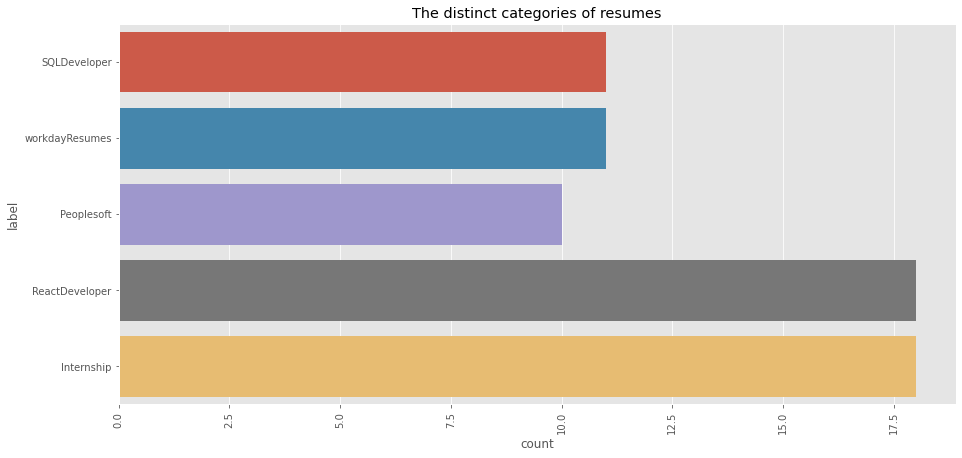

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="label", data=final,color=None)
plt.show()

In [49]:
import numpy as np

## Pie Plot

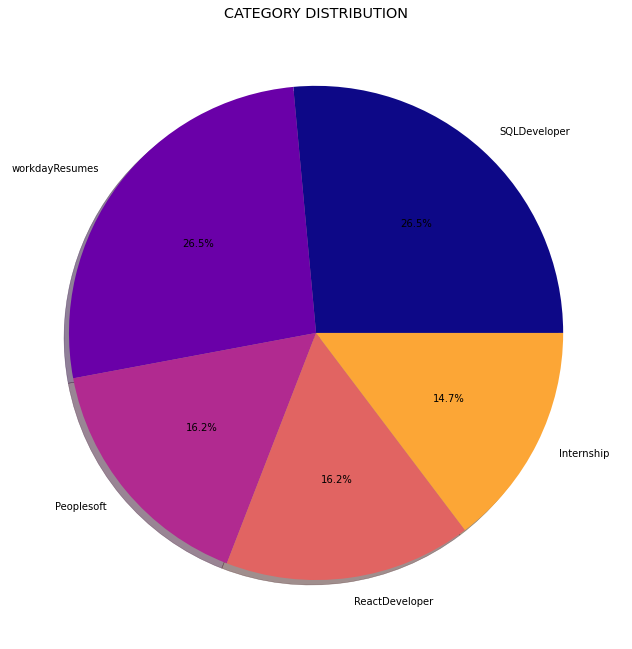

In [50]:
from matplotlib.gridspec import GridSpec
targetCounts = final.label.value_counts()
targetLabels  = final.label.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [51]:
import plotly.express as px

In [52]:
px.pie(data_frame=final,names="label",values=None,hover_name=None,
    hover_data=None,hole=0.05,)

In [53]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## Exploratory Data Analysis
### Text PreProcessing

In [54]:
stopwords=list(STOP_WORDS)
stopwords

['down',
 'then',
 'seems',
 '‘d',
 'thru',
 'before',
 'no',
 '’m',
 'at',
 'often',
 'own',
 'fifty',
 'would',
 'back',
 'twenty',
 'seeming',
 'first',
 'both',
 'perhaps',
 'rather',
 'have',
 'across',
 'upon',
 'made',
 'a',
 'whoever',
 'it',
 'or',
 'being',
 'your',
 'over',
 'why',
 'say',
 'nor',
 'and',
 'yet',
 'sometime',
 'whenever',
 'same',
 'third',
 'hereupon',
 'always',
 'itself',
 'we',
 'for',
 'top',
 'wherever',
 'been',
 'around',
 'in',
 'unless',
 'whereby',
 'whereas',
 '‘m',
 'can',
 'used',
 'latterly',
 'is',
 'that',
 'should',
 'n‘t',
 'you',
 'hundred',
 'five',
 'some',
 'also',
 'amongst',
 'former',
 'regarding',
 "'re",
 'above',
 'nobody',
 '‘re',
 'sometimes',
 "'ll",
 'really',
 'eight',
 'our',
 'up',
 'take',
 'noone',
 'without',
 'not',
 'via',
 'however',
 'something',
 'might',
 'go',
 'ours',
 'anyhow',
 'since',
 'enough',
 '‘s',
 'into',
 'latter',
 "n't",
 'another',
 'below',
 'her',
 'my',
 'during',
 'again',
 'was',
 'until',
 'w

In [55]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Cleaning Resume Text

## Segmentation and Lemmatisation and Normalisation
### Create a Function

In [56]:
clean = []
lz = WordNetLemmatizer()
for i in range(final.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        final["cv"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [57]:
final["Clean_Resume"] = clean

In [58]:
final

cv         label  \
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  SQLDeveloper   
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  SQLDeveloper   
2   BUDDHA VAMSI                                  ...  SQLDeveloper   
3   KAMBALLA PRADEEP                              ...  SQLDeveloper   
4    \n                                        Res...  SQLDeveloper   
..                                                ...           ...   
63  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...    Internship   
64  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...    Internship   
65  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...    Internship   
66  Ranga Gaganam  \n \n \nHaving 1+ years of succ...    Internship   
67  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...    Internship   

                                         Clean_Resume  
0   anil kumar maddukuri sql msbi developer summar...  
1   aradhana tripathi current location gachibowli ...  
2   buddha vamsi career objective year experience ...  
3   kamballa pradeep synopsis looking forward aspi...  
4   resume neeraj mishra having year month experie...  
..                                                ...  
63  mareedu lokesh babu professional overview year...  
64  md khizaruddin rauf experience currently worki...  
65  pranish sonone career summary experience year ...  
66  ranga gaganam having year successful experienc...  
67  shaik abdul sharuk year experience wipro caree...  

[68 rows x 3 columns]

In [173]:
final.to_csv('resume_dataset.csv')

In [59]:
final["Clean_Resume"][0]

'anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report microsoft business intelligence msbi tool expertise type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query cte temporary table table variable good experience set operator like union union intersect assist required data experience manipulate data multiple table report client aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service container loop container sequence container load data multiple source file database table expertise task like data flow task execute sql task control flow task execute package task execute process task bulk insert task sends mail task ftp task script task control flow level

## NER (Name Entity Recognition) Using Inbuilt Function of Spacy

In [60]:
nlp = spacy.load("en_core_web_sm")

In [61]:
text=nlp(final["Clean_Resume"][1])

In [62]:
displacy.render(text, style = "ent")

In [63]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - aradhana tripathi
DATE                 - year
ORG                  - stakeholder
PERSON               - jigyasa analytics
ORG                  - people tech group
PERSON               - jun mar project
ORG                  - sa athena aws development
ORG                  - sa
PERSON               - bangalore jun jul project
GPE                  - cgpa
ORG                  - mca


## Creating WordCloud

In [64]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r"[0-9]+", " ", resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

[('experience', 382), ('application', 284), ('server', 256), ('project', 249), ('report', 239), ('react', 232), ('workday', 194), ('j', 192), ('sql', 179), ('data', 177), ('web', 177), ('integration', 170), ('business', 167), ('peoplesoft', 156), ('process', 146), ('system', 144), ('skill', 139), ('knowledge', 132), ('html', 129), ('technology', 126), ('developer', 125), ('working', 123), ('development', 122), ('tool', 121), ('requirement', 120), ('service', 116), ('client', 113), ('role', 112), ('cs', 112), ('database', 109), ('user', 109), ('design', 108), ('worked', 107), ('like', 106), ('involved', 106), ('team', 106), ('environment', 105), ('good', 104), ('creating', 102), ('technical', 99), ('support', 97), ('work', 97), ('responsibility', 92), ('javascript', 92), ('component', 90), ('year', 88), ('table', 83), ('date', 78), ('hcm', 78), ('created', 76)]


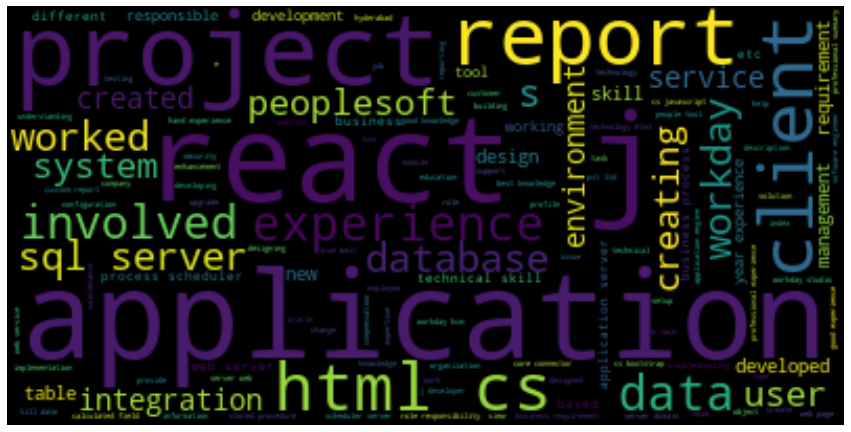

In [65]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = final.Clean_Resume
cleanedSentences = ""
for i in range(len(final.Clean_Resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent Words

In [66]:
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 382), ('application', 284), ('server', 256), ('project', 249), ('report', 239), ('react', 232), ('workday', 194), ('j', 192), ('sql', 179), ('data', 177), ('web', 177), ('integration', 170), ('business', 167), ('peoplesoft', 156), ('process', 146), ('system', 144), ('skill', 139), ('knowledge', 132), ('html', 129), ('technology', 126), ('developer', 125), ('working', 123), ('development', 122), ('tool', 121), ('requirement', 120), ('service', 116), ('client', 113), ('role', 112), ('cs', 112), ('database', 109), ('user', 109), ('design', 108), ('worked', 107), ('like', 106), ('involved', 106), ('team', 106), ('environment', 105), ('good', 104), ('creating', 102), ('technical', 99), ('support', 97), ('work', 97), ('responsibility', 92), ('javascript', 92), ('component', 90), ('year', 88), ('table', 83), ('date', 78), ('hcm', 78), ('created', 76)]


In [67]:
from collections import Counter

In [68]:
import seaborn as sns

In [69]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=["g","b","r","m"])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

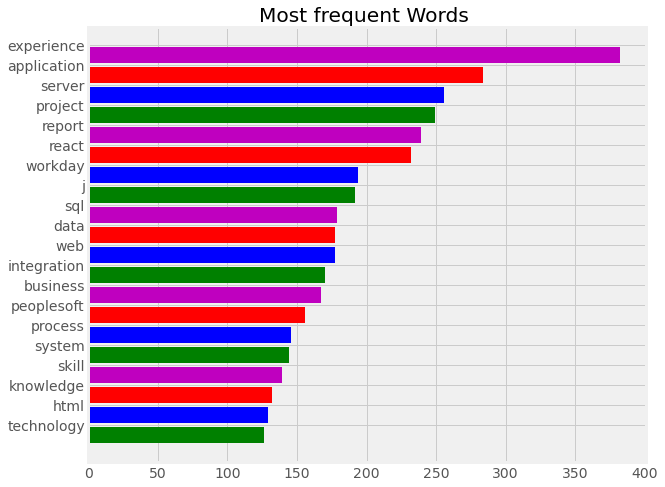

In [70]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(final,"Clean_Resume","Most frequent Words ")

In [71]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

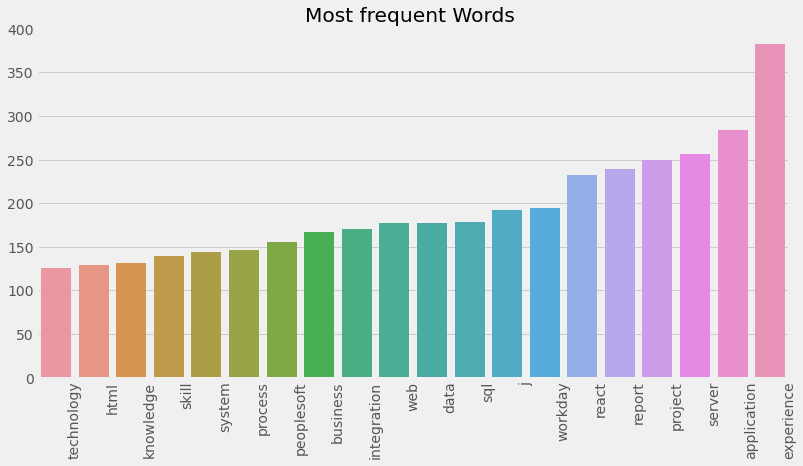

In [72]:
plt.figure(figsize=(12,6))
wordBarGraphFunction_1(final,"Clean_Resume","Most frequent Words ")

## Final DataFrame

In [73]:
resume_data=pd.DataFrame()

In [74]:
resume_data["Resume"]=final["Clean_Resume"]
resume_data["category"]=final["label"]

In [75]:
resume_data

Resume      category
0   anil kumar maddukuri sql msbi developer summar...  SQLDeveloper
1   aradhana tripathi current location gachibowli ...  SQLDeveloper
2   buddha vamsi career objective year experience ...  SQLDeveloper
3   kamballa pradeep synopsis looking forward aspi...  SQLDeveloper
4   resume neeraj mishra having year month experie...  SQLDeveloper
..                                                ...           ...
63  mareedu lokesh babu professional overview year...    Internship
64  md khizaruddin rauf experience currently worki...    Internship
65  pranish sonone career summary experience year ...    Internship
66  ranga gaganam having year successful experienc...    Internship
67  shaik abdul sharuk year experience wipro caree...    Internship

[68 rows x 2 columns]

## Labeling

In [76]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [77]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [78]:
resume_data

Resume      category  \
0   anil kumar maddukuri sql msbi developer summar...  SQLDeveloper   
1   aradhana tripathi current location gachibowli ...  SQLDeveloper   
2   buddha vamsi career objective year experience ...  SQLDeveloper   
3   kamballa pradeep synopsis looking forward aspi...  SQLDeveloper   
4   resume neeraj mishra having year month experie...  SQLDeveloper   
..                                                ...           ...   
63  mareedu lokesh babu professional overview year...    Internship   
64  md khizaruddin rauf experience currently worki...    Internship   
65  pranish sonone career summary experience year ...    Internship   
66  ranga gaganam having year successful experienc...    Internship   
67  shaik abdul sharuk year experience wipro caree...    Internship   

    Encoded_Skill  
0               3  
1               3  
2               3  
3               3  
4               3  
..            ...  
63              0  
64              0  
65              0  
66              0  
67              0  

[68 rows x 3 columns]

In [79]:
# saving the dataframe
#resume_data.to_csv('resume.csv')

In [80]:
resume_data.isna().sum()

Resume           0
category         0
Encoded_Skill    0
dtype: int64

In [81]:
resume_data.describe()

Encoded_Skill
count      68.000000
mean        1.808824
std         1.416927
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         4.000000

In [82]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resume         68 non-null     object
 1   category       68 non-null     object
 2   Encoded_Skill  68 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.5+ KB


## Vectorization

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
requiredText = resume_data["Resume"].values
requiredTarget = resume_data["Encoded_Skill"].values

## TF-IDF

In [85]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(47, 1500)
(21, 1500)


In [86]:
X_train.shape,y_train.shape

((47, 1500), (47,))

In [87]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 1496)	0.022787812428848288
  (0, 1483)	0.06487959679056196
  (0, 1482)	0.06212937584811541
  (0, 1481)	0.06436234029140646
  (0, 1480)	0.055448644535180405
  (0, 1479)	0.2160507795168893
  (0, 1473)	0.08764584609281584
  (0, 1443)	0.05088347400500381
  (0, 1439)	0.025999694335362877
  (0, 1420)	0.0953172014961609
  (0, 1405)	0.037478069006411104
  (0, 1404)	0.06010941380390987
  (0, 1395)	0.08764584609281584
  (0, 1390)	0.06436234029140646
  (0, 1375)	0.057289243718739905
  (0, 1370)	0.07681963242567824
  (0, 1364)	0.03956436462687722
  (0, 1360)	0.07681963242567824
  (0, 1357)	0.06436234029140646
  (0, 1347)	0.026388577912434246
  (0, 1344)	0.051222139650773595
  (0, 1342)	0.05088347400500381
  (0, 1330)	0.10324075303874007
  (0, 1328)	0.21446193624700574
  (0, 1321)	0.05499833120735231
  :	:
  (46, 504)	0.0808759985825889
  (46, 501)	0.14607458097343579
  (46, 474)	0.14607458097343579
  (46, 452)	0.10018110184784568
  (46, 447)	0.14607458097343579
  (46, 419)	0.065939

## Model Building

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Support Vector Machine

In [89]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 82.98%
SVM Classification Test Accuracy: 52.38%
Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.52        21
   macro avg       0.65      0.67      0.66        21
weighted avg       0.50      0.52      0.51        21



### Naive Bayes Classifier

In [90]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 0.83
Accuracy of MultinomialNB Classifier on test set: 0.52
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       1.00      1.00      1.00         3
           2       0.17      0.17      0.17         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.52        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.52      0.52      0.52        21




## Decision Tree Classifier

In [91]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 82.98%
Decision Tree Classification Test Accuracy: 38.1%
Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         6
           3       1.00      0.33      0.50         3
           4       0.50      0.67      0.57         3

    accuracy                           0.38        21
   macro avg       0.50      0.47      0.44        21
weighted avg       0.39      0.38      0.36        21



## Random Forest
### regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
regressor=RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 



m1_prediction = regressor.predict(X_test)
m1_score = regressor.score(X_test, y_test)

results = cross_val_score(regressor, X_train, y_train)

print("Random Forest Train Accuracy: {}%".format(round(regressor.score(X_train,y_train)*100,2)))
print("Random foresrt Test Accuracy: {}%".format(round(regressor.score(X_test,y_test)*100,2)))


Random Forest Train Accuracy: 78.32%
Random foresrt Test Accuracy: 22.35%


### Random forest classifier

In [93]:
from sklearn.model_selection import KFold, cross_val_score

In [94]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')
model.fit(X_train, y_train)
model_prediction = model.predict(X_test)
model_score = model.score(X_test, y_test)

results = cross_val_score(model, X_train, y_train, cv = kfold)

print("Random Forest Train Accuracy: {}%".format(round(model.score(X_train,y_train)*100,2)))
print("Random foresrt Test Accuracy: {}%".format(round(model.score(X_test,y_test)*100,2)))
model_cm = confusion_matrix(y_test, model_prediction)

print("Classification Report:\n")

print(classification_report(y_test, model_prediction))


Random Forest Train Accuracy: 82.98%
Random foresrt Test Accuracy: 52.38%
Classification Report:

              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       1.00      1.00      1.00         3
           2       0.17      0.17      0.17         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.52        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.52      0.52      0.52        21



### AdaBoost Classification

In [95]:
from sklearn.model_selection import KFold, cross_val_score

In [96]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

In [97]:
kfold = KFold(n_splits = 10, random_state =42, shuffle = True)
model2 = AdaBoostClassifier(n_estimators = 10, random_state =42)
model2.fit(X_train, y_train)
model2_prediction = model2.predict(X_test)
model2_score = model2.score(X_test, y_test)

print("Random Forest Train Accuracy: {}%".format(round(model2.score(X_train,y_train)*100,2)))
print("Random foresrt Test Accuracy: {}%".format(round(model2.score(X_test,y_test)*100,2)))

Random Forest Train Accuracy: 74.47%
Random foresrt Test Accuracy: 66.67%


In [98]:
model_cm = confusion_matrix(y_test, model2_prediction)
print(classification_report(y_test, model2_prediction))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3

    accuracy                           0.67        21
   macro avg       0.69      0.73      0.69        21
weighted avg       0.56      0.67      0.58        21



## XGBOOST

In [99]:
!pip install xgboost

In [100]:
from xgboost import XGBClassifier


In [155]:
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train)
model3_prediction = clf_xgb.predict(X_test)
model3_score = clf_xgb.score(X_test, y_test)
model3a_prediction = clf_xgb.predict(X_train)

print(classification_report(y_train,model3a_prediction))
print(classification_report(y_test,model3_prediction))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       1.00      1.00      1.00         7
           2       0.67      0.67      0.67        12
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8

    accuracy                           0.83        47
   macro avg       0.87      0.87      0.87        47
weighted avg       0.83      0.83      0.83        47

              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.75      1.00      0.86         3
           2       0.17      0.17      0.17         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3

    accuracy                           0.48        21
   macro avg       0.62      0.60      0.60        21
weighted avg       0.49      0.48      0.47        21



## K-Nearest Neighbors Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [112]:
import numpy as np
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [114]:
KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [115]:
print(grid.best_params_)

{'n_neighbors': 2}


### distance type=manhattan

In [116]:
knn = KNeighborsClassifier(n_neighbors=2,metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [157]:
y_pred = knn.predict(X_test)
y_pred
y1_pred = knn.predict(X_train)

In [121]:
    from sklearn.metrics import confusion_matrix  
    cm= confusion_matrix(y_test, y_pred)

In [122]:
cm

array([[5, 0, 1, 0, 0],
       [0, 3, 0, 0, 0],
       [6, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 0, 0, 0, 3]], dtype=int64)

In [158]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_train,y1_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        12
           1       1.00      0.86      0.92         7
           2       1.00      0.08      0.15        12
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         8

    accuracy                           0.72        47
   macro avg       0.90      0.76      0.73        47
weighted avg       0.87      0.72      0.67        47

              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3

    accuracy                           0.62        21
   macro avg       0.69      0.70      0.68        21
weighted avg       0.56      0.62      0.57        21



In [124]:
accuracy_score(y_test,y_pred)

0.6190476190476191

## Model Table

In [165]:
model_selections={'model name':['SVM Classification','Naive Bayes Classifier','Decision Tree Classifier','Random Forest Regressor',
                               'Random Forest Classifier','AdaBoost Classification','XGBoostClassifier','K-Nearest Neighbors Classifier'],
                 'trainig_accuracy':['82.98%','83%','82.98%','78.32%','82.98%','74.47%','83%','72%'],
                 'testing_accuracy':['52.38%','52%','38.1%','22.35%','52.38%','66.67%','48%','62%']}

In [171]:
df = pd.DataFrame(model_selections, index=['1','2','3','4','5','6','7','8'])

In [172]:
df

model name trainig_accuracy testing_accuracy
1              SVM Classification           82.98%           52.38%
2          Naive Bayes Classifier              83%              52%
3        Decision Tree Classifier           82.98%            38.1%
4         Random Forest Regressor           78.32%           22.35%
5        Random Forest Classifier           82.98%           52.38%
6         AdaBoost Classification           74.47%           66.67%
7               XGBoostClassifier              83%              48%
8  K-Nearest Neighbors Classifier              72%              62%